# A live demo of the pyam package

This notebook presents a number of features of the **pyam** package to complement  
a presentation at the *Strommarkttreffen-Online* seminar series ([link](https://www.strommarkttreffen.org/online/))
by Daniel Huppmann on July 14, 2021.

The slides for the presentation are available
at the DOI [10.22022/IACC/07-2021.17319](https://doi.org/10.22022/IACC/07-2021.17319).

This tutorial is based on the advanced assignment
of the [Modelling Lab](https://github.com/danielhuppmann/climate-risks-academy-2021),
which was part of the *Climate Risks Academy 2021* organized by
the European University Institute (EUI) Florence School of Banking and Finance
in cooperation with Oliver Wyman.

The scenario data used in this tutorial notebook is taken from
the [NGFS Scenario Explorer hosted by IIASA](https://data.ece.iiasa.ac.at/ngfs),
Phase 2 (June 2021).

### Requirements

You can install the **pyam** package using the following command -
note the subtle naming difference on [pypi.org](https://pypi.org/project/pyam-iamc/).

```
pip install pyam-iamc
```

[Read the docs](https://pyam-iamc.readthedocs.io/en/stable/install.html) for alternative installation options.

In [1]:
import pyam

<IPython.core.display.Javascript object>

## Import and inspect the scenario data

Just calling an **IamDataFrame** prints an overview of all index dimensions and coordinates.

In [2]:
tutorial_df = pyam.IamDataFrame("data/ngfs_data_snapshot.xlsx")
tutorial_df

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file data/ngfs_data_snapshot.xlsx
pyam.core - INFO: Reading meta indicators


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM 1.1, REMIND-MAgPIE 2.1-4.2 (2)
 * scenario : Current Policies, Delayed transition, ... Net Zero 2050 (4)
Timeseries data coordinates:
   region   : R5ASIA, R5LAM, R5MAF, R5OECD90+EU, R5REF, World (6)
   variable : Emissions|CO2, Price|Carbon, Primary Energy|Biomass, ... Temperature (9)
   unit     : EJ/yr, Mt CO2/yr, US$2010/t CO2, °C rel. to 1850-1900 (4)
   year     : 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, ... 2100 (10)
Meta indicators:
   exclude (bool) False (1)

Because there are more scenarios and variables than can be displayed in one line, the summary only shows a few items.

We can easily display all items of an index dimension or a coordinate individually using attributes of the **IamDataFrame**.

In [3]:
tutorial_df.variable

['Emissions|CO2',
 'Price|Carbon',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Temperature']

In [4]:
tutorial_df.scenario

['Current Policies',
 'Delayed transition',
 'Nationally Determined Contributions (NDCs)',
 'Net Zero 2050']

For the remainder of this noteboook, we only use the global data from this scenario ensemble.  
Therefore, we [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter)
to the data of interest...

In [5]:
df = tutorial_df.filter(region="World")

## A few simple plots

As a first step to get an idea of the scenario data, let's draw some [plots](https://pyam-iamc.readthedocs.io/en/stable/api/plotting.html).

Why not start with the temperature?

<AxesSubplot:title={'center':'region: World - variable: Temperature'}, xlabel='Year', ylabel='°C rel. to 1850-1900'>

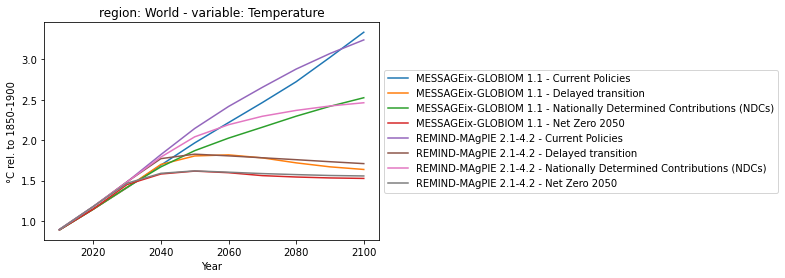

In [6]:
df.filter(variable="Temperature").plot(legend=dict(loc="outside right"))

Let's apply some styling by model and scenario...

<AxesSubplot:title={'center':'region: World - variable: Temperature'}, xlabel='Year', ylabel='°C rel. to 1850-1900'>

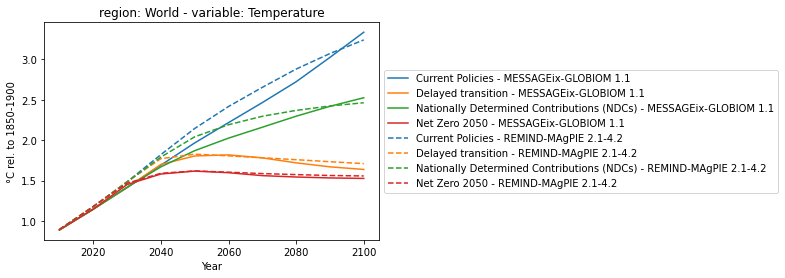

In [7]:
df.filter(variable="Temperature").plot(color="scenario", linestyle="model", legend=dict(loc="outside right"))

## Computing aggregates

If you look at the list of variables in the scenario data, you'll see that we initially only have sub-categories of *Primary Energy*.

However, **pyam** offers a number of useful functions to aggregate (or downscale) by sectors or regions.

### Aggregation by sector

By default, the [aggregate()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.aggregate) method
takes all components of the given variable, in this case `Primary Energy|*`.<br />
It returns a new **IamDataFrame** - and the cell displays the summary. You will see that the object has exactly one variable now.

In [8]:
df.aggregate("Primary Energy")

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : MESSAGEix-GLOBIOM 1.1, REMIND-MAgPIE 2.1-4.2 (2)
 * scenario : Current Policies, Delayed transition, ... Net Zero 2050 (4)
Timeseries data coordinates:
   region   : World (1)
   variable : Primary Energy (1)
   unit     : EJ/yr (1)
   year     : 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, ... 2100 (10)
Meta indicators:
   exclude (bool) False (1)

<AxesSubplot:title={'center':'region: World - variable: Primary Energy'}, xlabel='Year', ylabel='EJ/yr'>

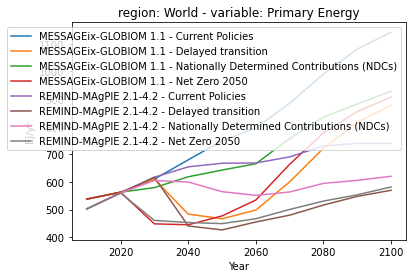

In [9]:
df.aggregate("Primary Energy").plot()

Or you can use the [timeseries()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.timeseries) method to show the timeseries data in wide format.

In [10]:
df.aggregate("Primary Energy").timeseries()

2010  \
model                 scenario                                   region variable       unit               
MESSAGEix-GLOBIOM 1.1 Current Policies                           World  Primary Energy EJ/yr  537.57828   
                      Delayed transition                         World  Primary Energy EJ/yr  537.57828   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  537.57828   
                      Net Zero 2050                              World  Primary Energy EJ/yr  537.57828   
REMIND-MAgPIE 2.1-4.2 Current Policies                           World  Primary Energy EJ/yr  502.19330   
                      Delayed transition                         World  Primary Energy EJ/yr  502.19330   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  502.19330   
                      Net Zero 2050                              World  Primary Energy EJ/yr  502.19330   

                                                                                                    2020  \
model                 scenario                                   region variable       unit                
MESSAGEix-GLOBIOM 1.1 Current Policies                           World  Primary Energy EJ/yr  562.670773   
                      Delayed transition                         World  Primary Energy EJ/yr  562.670773   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  562.670773   
                      Net Zero 2050                              World  Primary Energy EJ/yr  562.670773   
REMIND-MAgPIE 2.1-4.2 Current Policies                           World  Primary Energy EJ/yr  559.835600   
                      Delayed transition                         World  Primary Energy EJ/yr  559.835600   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  559.835600   
                      Net Zero 2050                              World  Primary Energy EJ/yr  559.835600   

                                                                                                    2030  \
model                 scenario                                   region variable       unit                
MESSAGEix-GLOBIOM 1.1 Current Policies                           World  Primary Energy EJ/yr  610.009066   
                      Delayed transition                         World  Primary Energy EJ/yr  610.009066   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  579.226395   
                      Net Zero 2050                              World  Primary Energy EJ/yr  448.014549   
REMIND-MAgPIE 2.1-4.2 Current Policies                           World  Primary Energy EJ/yr  616.908100   
                      Delayed transition                         World  Primary Energy EJ/yr  616.908100   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  605.097300   
                      Net Zero 2050                              World  Primary Energy EJ/yr  460.599200   

                                                                                                    2040  \
model                 scenario                                   region variable       unit                
MESSAGEix-GLOBIOM 1.1 Current Policies                           World  Primary Energy EJ/yr  679.793401   
                      Delayed transition                         World  Primary Energy EJ/yr  483.437699   
                      Nationally Determined Contributions (NDCs) World  Primary Energy EJ/yr  618.437380   
                      Net Zero 2050                              World  Primary Energy EJ/yr  444.766431   
REMIND-MAgPIE 2.1-4.2 Current Policies                           World  Primary Energy EJ/yr  654.444900   
                      Delayed transition                         World  Primary Energy EJ/yr  440.465300   
  

It is often convenient to directly append computed timeseries data to the original object.
For that, you can use the `append=True` keyword argument.

In [11]:
df.aggregate("Primary Energy", append=True)

When displaying the variables of the **IamDataFrame** again, there is now an additional variable `Primary Energy`.

In [12]:
df.variable

['Emissions|CO2',
 'Price|Carbon',
 'Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Temperature']

### Aggregation by region

In the interest of time, the features for regional aggregation and downscaling are not shown in this notebook.

Take a look at [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/aggregating_downscaling_consistency.html)
for more information!

## Categorization of scenarios by their temperature outcome

We often want to categorize scenarios by some metrics or indicators.
As an example, let us divide scenarios into groups "above 2C" and "below 2C".

First, we assign all scenarios to the "above 2C" group,
and then use the [categorize()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.categorize) method
to re-assign all scenarios that satisfy certain criteria.

In [13]:
df.set_meta(meta="above 2C", name="warming-category")

In [14]:
df.categorize(
    "warming-category", "below 2C",
    criteria={"Temperature": {"up": 2.0}},
)

pyam.core - INFO: 4 scenarios categorized as `warming-category: below 2C`


We can inspect the assignment of categories via the `meta` attribute.

In [15]:
df.meta

exclude  \
model                 scenario                                              
MESSAGEix-GLOBIOM 1.1 Current Policies                              False   
                      Delayed transition                            False   
                      Nationally Determined Contributions (NDCs)    False   
                      Net Zero 2050                                 False   
REMIND-MAgPIE 2.1-4.2 Current Policies                              False   
                      Delayed transition                            False   
                      Nationally Determined Contributions (NDCs)    False   
                      Net Zero 2050                                 False   

                                                                 warming-category  
model                 scenario                                                     
MESSAGEix-GLOBIOM 1.1 Current Policies                                   above 2C  
                      Delayed transition                                 below 2C  
                      Nationally Determined Contributions (NDCs)         above 2C  
                      Net Zero 2050                                      below 2C  
REMIND-MAgPIE 2.1-4.2 Current Policies                                   above 2C  
                      Delayed transition                                 below 2C  
                      Nationally Determined Contributions (NDCs)         above 2C  
                      Net Zero 2050                                      below 2C

We can now use this categorization to assign styles for the plots of other variables.

<AxesSubplot:title={'center':'region: World - variable: Primary Energy|Gas'}, xlabel='Year', ylabel='EJ/yr'>

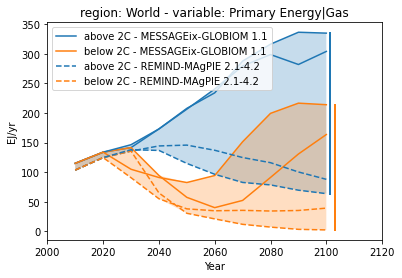

In [16]:
(
    df.filter(variable="Primary Energy|Gas")
    .plot(color="warming-category", linestyle="model", fill_between=True, final_ranges=True)
)

Of course, **pyam** also supports a lot of other plot types and styles -
check out the [plotting gallery](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html)!

## Algebraic operations

**pyam** can also perform algebraic directly on the timeseries data.

All algebraic-operations functions (
[add()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.add),
[subtract()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.subtract),
[multiply()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.multiply),
[divide()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.divide)
) follow the syntax:

```
df.<method>(a, b, c) => a <op> b = c
```

If possible, **pyam** will try to keep the unit consistent during the operation.  
This feature is supported by the **pint** and the **iam-units** packages,
see [here](https://github.com/iamconsortium/units).

## Computing the amount of primary energy that is not coal

First, we subtract coal from total primary energy and draw a simple plot.  
For this section, we will use a downselected version of the scenario data that only has global values.

<AxesSubplot:title={'center':'region: World - variable: diff'}, xlabel='Year', ylabel='EJ/yr'>

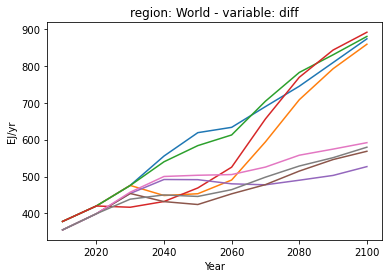

In [17]:
df.subtract("Primary Energy", "Primary Energy|Coal", "diff").plot(legend=False)

### Computing coal as a share of primary energy

Next, we can also compute the share of coal relative to total primary energy, and again draw the plot.

<AxesSubplot:title={'center':'region: World - variable: Share of coal'}, xlabel='Year', ylabel='Value'>

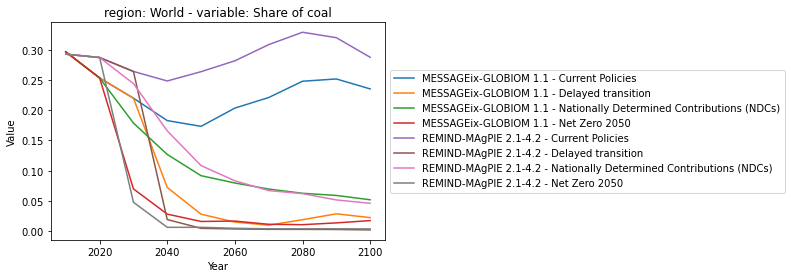

In [18]:
df.divide("Primary Energy|Coal", "Primary Energy", "Share of coal").plot(legend=dict(loc="outside right"))

Note that **pyam** has automatically changed the unit on the y-axis.
Dividing `EJ/yr` by `EJ/yr` yiels in a dimensionless value.

### Compute ratio of energy sources between different scenarios

So far, we used the algebraic operations on the (default) *variable* axis.
But **pyam** also supports these operations on any other axis of the timeseries data!

Now, we compute the relative indicator between the *Net Zero 2050* and the *Current Policies* scenarios,
and again plot the resulting timeseries data.  
For simplicity, we only perform this computation on primary-energy values (including the sub-categories)
of the *REMIND* model.

In [19]:
df_pe = df.filter(model="REMIND-MAgPIE 2.1-4.2", variable="Primary Energy*")

<AxesSubplot:title={'center':'model: REMIND-MAgPIE 2.1-4.2 - scenario: diff - region: World'}, xlabel='Year', ylabel='Value'>

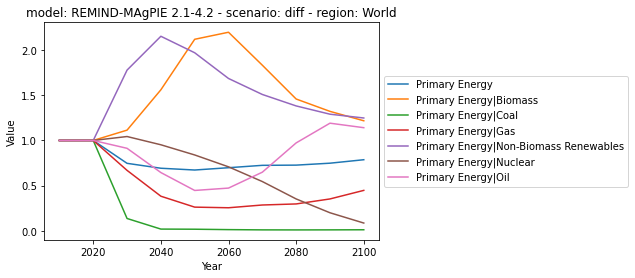

In [20]:
(
    df_pe.divide("Net Zero 2050", "Current Policies", "diff", axis="scenario")
    .plot(legend=dict(loc="outside right"))
)

In [21]:
import matplotlib.pyplot as plt

As a final illustration, this tutorials shows how to use **matplotlib** and **pyam** to create several plots next to each other.

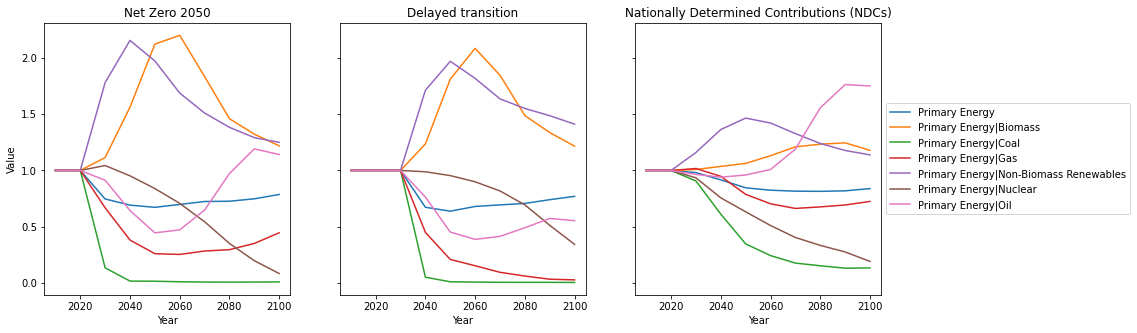

In [22]:
baseline = "Current Policies"
scenario = set(df.scenario) - set([baseline])

# We first create a matplotlib figure with several "axes" objects (i.e., individual plots)
fig, ax = plt.subplots(1, len(scenario), figsize=(15, 5), sharey=True)

# Then, we iterate over the axes, plotting the results for each scenario as we go along
for i, s in enumerate(scenario):
    (
        df_pe.divide(s, baseline, "diff", axis="scenario")
        .plot(ax=ax[i], legend=dict(loc="outside right") if i==len(scenario) - 1 else False)
    )

    # We can also modify the axes objects directly to produce a better figure
    ax[i].set_title(s)

<div class="alert alert-info">
    
**Curious about more pyam features?** Check out the all the pyam tutorials on our [ReadTheDocs page](https://pyam-iamc.readthedocs.io/en/stable/tutorials.html)!

</div>